# Fake News Detection


Importing necessary libraries

In [81]:
import numpy as np
import pandas as p
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

Importing the data from the fake and real csv

In [82]:
df1=p.read_csv("Fake.csv")
df1['label']=0
df2 =p.read_csv("True.csv")
df2['label']=1

Merging the two data frames

In [83]:
df = p.concat([df1, df2])

In [84]:
df

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


0    23481
1    21417
Name: label, dtype: int64


<AxesSubplot:xlabel='label', ylabel='count'>

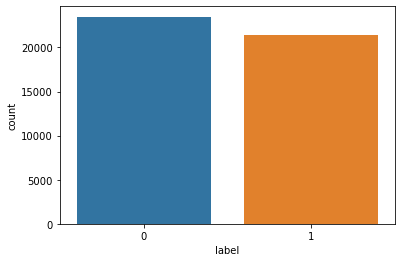

In [115]:
import seaborn as sns
print(df['label'].value_counts())

sns.countplot(x='label',data=df)

Data Preprocessing

In [85]:
#Removing the news source and the location at the beginning of news articles
def split_news(text):
    if '(Reuters)' in text:
        text = text.split('(Reuters)')

        return ' '.join(text[1:])
    return text

df['text'] = df['text'].apply(split_news)

In [86]:
#Converting the string to lowercase
df['title'] = df['title'].str.lower()
df['text'] = df['text'].str.lower()

In [87]:
df

,title,text,subject,date,label
0,donald trump sends out embarrassing new year’...,donald trump just couldn t wish all americans ...,News,"December 31, 2017",0
1,drunk bragging trump staffer started russian ...,house intelligence committee chairman devin nu...,News,"December 31, 2017",0
2,sheriff david clarke becomes an internet joke...,"on friday, it was revealed that former milwauk...",News,"December 30, 2017",0
3,trump is so obsessed he even has obama’s name...,"on christmas day, donald trump announced that ...",News,"December 29, 2017",0
4,pope francis just called out donald trump dur...,pope francis used his annual christmas day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
21412,'fully committed' nato backs new u.s. approach...,- nato allies on tuesday welcomed president d...,worldnews,"August 22, 2017",1
21413,lexisnexis withdrew two products from chinese ...,"- lexisnexis, a provider of legal, regulatory...",worldnews,"August 22, 2017",1
21414,minsk cultural hub becomes haven from authorities,- in the shadow of disused soviet-era factori...,worldnews,"August 22, 2017",1
21415,vatican upbeat on possibility of pope francis ...,- vatican secretary of state cardinal pietro ...,worldnews,"August 22, 2017",1


In [88]:
#Removing non-alphabetical characters
df['title'] = df['title'].str.replace('[^a-zA-Z]', ' ', regex=True).str.strip()
df['text'] = df['text'].str.replace('[^a-zA-Z]', ' ', regex=True).str.strip()

In [91]:
X = df['title']
X1 = df['text']
y = df['label']

Comparing 5 fold cross validation scores for MNB and SVM for both title and text of the articles

In [12]:
#Vectorizers for MNB for title

##MNB TFIDF
mNB_tfidf_pipe = Pipeline([('nb_tf',TfidfVectorizer(encoding='latin-1',use_idf=True,binary=False, stop_words='english')),('nb',MultinomialNB())])
scores = cross_val_score(mNB_tfidf_pipe,X,y,cv=5)
print(sum(scores)/len(scores))

##MNB TF
mNB_tf_pipe = Pipeline([('nb_tf',TfidfVectorizer(encoding='latin-1',use_idf=False,binary=False, stop_words='english')),('nb',MultinomialNB())])
scores = cross_val_score(mNB_tf_pipe,X,y,cv=5)
print(sum(scores)/len(scores))

##MNB with Bool
nb_clf_pipe = Pipeline([('vect', CountVectorizer(encoding='latin-1', binary=True, stop_words='english')),('nb', MultinomialNB())])
scores = cross_val_score(nb_clf_pipe, X, y, cv=5)
avg=sum(scores)/len(scores)
print(avg)

0.911444923083334
0.9127367619223374
0.9163670737784353


In [13]:
#Vectorizers for MNB for text

#MNB TFIDF
mNB_tfidf_pipe = Pipeline([('nb_tf',TfidfVectorizer(encoding='latin-1',use_idf=True,binary=False, stop_words='english')),('nb',MultinomialNB())])
scores = cross_val_score(mNB_tfidf_pipe,X1,y,cv=5)
print(sum(scores)/len(scores))

##MNB TF
mNB_tf_pipe = Pipeline([('nb_tf',TfidfVectorizer(encoding='latin-1',use_idf=False,binary=False, stop_words='english')),('nb',MultinomialNB())])
scores = cross_val_score(mNB_tf_pipe,X1,y,cv=5)
print(sum(scores)/len(scores))

##MNB with Bool
nb_clf_pipe = Pipeline([('vect', CountVectorizer(encoding='latin-1', binary=True, stop_words='english')),('nb', MultinomialNB())])
scores = cross_val_score(nb_clf_pipe, X1, y, cv=5)
avg=sum(scores)/len(scores)
print(avg)

0.8942279820943251
0.9004641416460235
0.9235155030135896


In [14]:
#Vectorizers for SVM for title

##SVC TFIDF
svc_tfidf_pipe = Pipeline([('nb_tf',TfidfVectorizer(encoding='latin-1',use_idf=True,binary=False, stop_words='english')),('svc',LinearSVC())])
scores = cross_val_score(svc_tfidf_pipe,X,y,cv=5)
print(sum(scores)/len(scores))

##SVC TF
svc_tf_pipe = Pipeline([('nb_tf',TfidfVectorizer(encoding='latin-1',use_idf=False,binary=False, stop_words='english')),('svc',LinearSVC())])
scores = cross_val_score(svc_tf_pipe,X,y,cv=5)
print(sum(scores)/len(scores))

##SVC with Bool
svc_clf_pipe = Pipeline([('vect', CountVectorizer(encoding='latin-1',ngram_range =(1,3), binary=True, stop_words='english')),('svc', LinearSVC())])
scores = cross_val_score(svc_clf_pipe, X, y, cv=5)
avg=sum(scores)/len(scores)
print(avg)

0.9189056672944617
0.9184156325164556
0.9179032144045088


In [15]:
#Vectorizers for SVM for text

##SVC TFIDF
svc_tfidf_pipe = Pipeline([('nb_tf',TfidfVectorizer(encoding='latin-1',use_idf=True,binary=False, stop_words='english')),('svc',LinearSVC())])
scores = cross_val_score(svc_tfidf_pipe,X1,y,cv=5)
print(sum(scores)/len(scores))

##SVC TF
svc_tf_pipe = Pipeline([('nb_tf',TfidfVectorizer(encoding='latin-1',use_idf=False,binary=False, stop_words='english')),('svc',LinearSVC())])
scores = cross_val_score(svc_tf_pipe,X1,y,cv=5)
print(sum(scores)/len(scores))

##SVC with Bool
svc_clf_pipe = Pipeline([('vect', CountVectorizer(encoding='latin-1',ngram_range =(1,3), binary=True, stop_words='english')),('svc', LinearSVC())])
scores = cross_val_score(svc_clf_pipe, X1, y, cv=5)
avg=sum(scores)/len(scores)
print(avg)

0.9746538805840206
0.9749656002585592


C:\Users\shiva\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.9767473349719005


Training SVM Term Frequency Vectorizer for the title

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
unigram_count_vectorizer = TfidfVectorizer(encoding='latin-1',use_idf=False,binary=False, stop_words='english')
X_train_vec = unigram_count_vectorizer.fit_transform(X_train)

In [93]:
X_test_vec = unigram_count_vectorizer.transform(X_test)

In [94]:
# import the LinearSVC module
from sklearn.svm import LinearSVC

# initialize the LinearSVC model
svm_clf = LinearSVC(C=1)

# use the training data to train the model
svm_clf.fit(X_train_vec,y_train)

LinearSVC(C=1)

In [95]:
feature_ranks = sorted(zip(svm_clf.coef_[0], unigram_count_vectorizer.get_feature_names()))

In [96]:
very_negative_10 = feature_ranks[-10:]
print("Features for true news")
for i in range(0, len(very_negative_10)):
    print(very_negative_10[i])
print()

Features for true news
(1.6239491539913786, 'egypt')
(1.649915577537006, 'brazil')
(1.678654597930993, 'ukraine')
(1.7057089930525327, 'kremlin')
(1.7354058447529808, 'says')
(1.78345873007935, 'rohingya')
(1.7835632788189941, 'exclusive')
(1.7847610197869292, 'myanmar')
(1.8822074397941162, 'urges')
(3.0322434161871907, 'factbox')



In [97]:
## get 10 features that are least relevant to "very negative" sentiment (they are at the top of the ranked list)
not_very_negative_10 = feature_ranks[:10]
print("Fake news")
for i in range(0, len(not_very_negative_10)):
    print(not_very_negative_10[i])
print()

Fake news
(-3.8564579724748334, 'video')
(-3.604059041955846, 'breaking')
(-3.6003081920125517, 'gop')
(-2.9005018515325354, 'watch')
(-2.8003474372940698, 'just')
(-2.6761916388848794, 'lied')
(-2.6630234392499754, 'hillary')
(-2.632086117419729, 'racist')
(-2.613430715015848, 'illegals')
(-2.586159398444005, 'bernie')



In [101]:
svm_clf.score(X_test_vec,y_test)

0.9479398663697105

In [102]:
#Confusion Matrix and classification report
from sklearn.metrics import confusion_matrix
y_pred = svm_clf.predict(X_test_vec)
cm=confusion_matrix(y_test, y_pred, labels=[0,1])
print(cm)
print()

from sklearn.metrics import classification_report
target_names = ['0','1']
print(classification_report(y_test, y_pred, target_names=target_names))

[[8860  480]
 [ 455 8165]]

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      9340
           1       0.94      0.95      0.95      8620

    accuracy                           0.95     17960
   macro avg       0.95      0.95      0.95     17960
weighted avg       0.95      0.95      0.95     17960



In [103]:
err_cnt = 0
for i in range(0, len(y_test)):
    if(y_test.iloc[i]==0 and y_pred[i]==1):
        print(X_test.iloc[i])
        err_cnt = err_cnt+1
        if err_cnt>5:
            break
print("errors:", err_cnt)

traffic is for the little people clinton carpetbaggers get wall  guards and now private street for ny house
nc governor robs disaster relief fund to hire lawyers to defend trans bathroom bill
the internet can t stop laughing after sean spicer says trump is  tough on russia
florida governor rick scott tax cut his way into massive hiv aids comeback
democrats launch plan to make trump s first speech to congress very uncomfortable
some of the white house leaks may be coming from the most unexpected place
errors: 6


In [104]:
err_cnt = 0
for i in range(0, len(y_test)):
    if(y_test.iloc[i]==1 and y_pred[i]==0):
        print(X_test.iloc[i])
        err_cnt = err_cnt+1
        if err_cnt>5:
            break
print("errors:", err_cnt)

trump vs  clinton  debate will mark biggest moment of election
trump could easily erase much of obama s foreign policy legacy
senior u s  republican senator   let mr  mueller do his job
trump picks white collar crime lawyer to replace comey at fbi
congresswoman quits democratic national committee  endorses bernie sanders
trump  hurricane irma has  absolutely historic destructive potential
errors: 6


Training SVM Term Frequency Vectorizer for the text

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.4, random_state=0)
unigram_count_vectorizer = TfidfVectorizer(encoding='latin-1',use_idf=False,binary=False, stop_words='english')
X_train_vec = unigram_count_vectorizer.fit_transform(X_train)

In [106]:
X_test_vec = unigram_count_vectorizer.transform(X_test)

In [107]:
# import the LinearSVC module
from sklearn.svm import LinearSVC

# initialize the LinearSVC model
svm_clf = LinearSVC(C=1)

# use the training data to train the model
svm_clf.fit(X_train_vec,y_train)

LinearSVC(C=1)

In [108]:
feature_ranks = sorted(zip(svm_clf.coef_[0], unigram_count_vectorizer.get_feature_names()))

In [109]:
very_negative_10 = feature_ranks[-10:]
print("Features for true news")
for i in range(0, len(very_negative_10)):
    print(very_negative_10[i])
print()

Features for true news
(2.2297721500105427, 'representatives')
(2.2667940511179188, 'edt')
(2.762624571957347, 'monday')
(2.797585152453526, 'friday')
(2.829570609144373, 'said')
(2.852219059281572, 'tuesday')
(3.004883393157265, 'wednesday')
(3.0615148354020674, 'nov')
(3.2583797666589525, 'reuters')
(3.307663839480218, 'thursday')



In [110]:
## get 10 features that are least relevant to "very negative" sentiment (they are at the top of the ranked list)
not_very_negative_10 = feature_ranks[:10]
print("Fake news")
for i in range(0, len(not_very_negative_10)):
    print(not_very_negative_10[i])
print()

Fake news
(-5.869126200390745, 'read')
(-4.420470682501291, 'featured')
(-4.367325501578731, 'gop')
(-3.630252135195922, 'image')
(-3.6067885512076834, 'sen')
(-3.4635361131427294, 'getty')
(-3.3207600567927487, 'mr')
(-3.2414189399370685, 'wire')
(-3.133792029075272, 'rep')
(-3.104191567667746, 'com')



In [111]:
svm_clf.score(X_test_vec,y_test)

0.9842984409799554

In [112]:
#Confusion Matrix and classification report
from sklearn.metrics import confusion_matrix
y_pred = svm_clf.predict(X_test_vec)
cm=confusion_matrix(y_test, y_pred, labels=[0,1])
print(cm)
print()

from sklearn.metrics import classification_report
target_names = ['0','1']
print(classification_report(y_test, y_pred, target_names=target_names))

[[9204  136]
 [ 146 8474]]

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      9340
           1       0.98      0.98      0.98      8620

    accuracy                           0.98     17960
   macro avg       0.98      0.98      0.98     17960
weighted avg       0.98      0.98      0.98     17960



In [113]:
err_cnt = 0
for i in range(0, len(y_test)):
    if(y_test.iloc[i]==0 and y_pred[i]==1):
        print(X_test.iloc[i])
        err_cnt = err_cnt+1
        if err_cnt>0:
            break
print("errors:", err_cnt)

after years of debate  the house on thursday voted to repeal key parts of the affordable care act and replace them with new provisions the vote  which president donald trump was planning to tout as a big victory  sends the republican sponsored bill to gut obamacare to the senate for consideration but winning approval for the bill could be even more difficult in the senate than it has been in the house  where republican leaders struggled for nearly two months to wrangle enough votes in their caucus to secure its passage the bill passed by a vote of     to      all     democrats voting opposed the bill  they were joined by    republicans voting  no  a lot of us have waited seven years to case this vote   house speaker paul ryan  r wis   said shortly before the voting began   many of us are here because we pledged to cast this vote  to repeal and replace obamacare  this bill delivers the promises we have made to the american people   ryan said house majority whip steve scalise  r la   tol

In [114]:
err_cnt = 0
for i in range(0, len(y_test)):
    if(y_test.iloc[i]==1 and y_pred[i]==0):
        print(X_test.iloc[i])
        err_cnt = err_cnt+1
        if err_cnt>0:
            break
print("errors:", err_cnt)

the u s  supreme court on tuesday wrestled with the question of under what circumstances judges can recall jurors to duty after they have rendered a verdict  in a case involving a man seeking damages after suffering injuries in a montana car accident  the justices  during an hour of arguments  indicated that a gap of just a few minutes in which there is no opportunity for jurors to be exposed to any information that could prejudice their views of the case may be permissible  that would mean north dakota man rocky dietz  who sued a man named hillary bouldin for negligence after the      accident in the city of bozeman  would lose his bid for a new trial  bouldin ran a red light and his vehicle hit the passenger side of dietz s vehicle  bouldin admitted he was responsible for the collision  the jury initially awarded dietz nothing  but the judge recalled the jurors within minutes after they had been discharged from duty  reminding them that bouldin s lawyers had earlier stipulated dietz 

In [119]:
#Topic Modeling
from sklearn.decomposition import NMF, LatentDirichletAllocation

no_features = 1000
no_topics = 5

# Run NMF
#nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

# Run LDA
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, ngram_range = (1,2), max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(X)
tf_feature_names = tf_vectorizer.get_feature_names()
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0)
lda_z = lda.fit_transform(tf)

In [120]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 20

In [121]:
display_topics(lda, tf_feature_names, no_top_words)

Topic 0:
trump north korea north korea court eu iran senate minister government brexit tax republican turkey uk campaign war nuclear plan america
Topic 1:
house russia clinton white trump white house hillary obama military law syria russian myanmar probe foreign tells media say attack election
Topic 2:
says trump obama video president china watch deal talks news breaking factbox election putin trump says urges hillary poll cnn france
Topic 3:
vote police video pm south black new saudi islamic leader border opposition presidential islamic state killed mexico man support gun race
Topic 4:
trump video state party anti security congress donald ban donald trump governor speech judge democrats trade sanders gop aid help obamacare


In [122]:
#Assigning the topic number for every news article
topic_list = []
for i in range(lda_z.shape[0]):
    topic_list.append(np.argmax(lda_z[i]))
import pandas as pd
df['topic'] = (pd.DataFrame(topic_list))

In [127]:
#Checking data balance
occur1 = df.groupby(['topic', 'label']).size()
occur1

topic  label
0      0        2738
       1        2364
1      0        3771
       1        3380
2      0        7625
       1        7197
3      0        3276
       1        2975
4      0        6071
       1        5501
dtype: int64

In [141]:
#Training with topics 2 and 4
#Testing with topics 0, 1 and 3
df_train1 = df[df['topic'] == 2].append(df[df['topic'] == 4])
df_test1 = df[df['topic'] == 0].append(df[df['topic'] == 1]).append(df[df['topic'] == 3])

Training on title

In [144]:
X_train = df_train1['title']
y_train = df_train1['label']
X_test = df_test1['title']
y_test = df_test1['label']

In [146]:
unigram_count_vectorizer = TfidfVectorizer(encoding='latin-1',use_idf=False,binary=False, stop_words='english')
X_train_vec = unigram_count_vectorizer.fit_transform(X_train)

In [147]:
X_test_vec = unigram_count_vectorizer.transform(X_test)

In [148]:
# import the LinearSVC module
from sklearn.svm import LinearSVC

# initialize the LinearSVC model
svm_clf = LinearSVC(C=1)

# use the training data to train the model
svm_clf.fit(X_train_vec,y_train)

LinearSVC(C=1)

In [149]:
#Confusion Matrix and Classification report
from sklearn.metrics import confusion_matrix
y_pred = svm_clf.predict(X_test_vec)
cm=confusion_matrix(y_test, y_pred, labels=[0,1])
print(cm)
print()

from sklearn.metrics import classification_report
target_names = ['0','1']
print(classification_report(y_test, y_pred, target_names=target_names))

[[7376 2409]
 [ 265 8454]]

              precision    recall  f1-score   support

           0       0.97      0.75      0.85      9785
           1       0.78      0.97      0.86      8719

    accuracy                           0.86     18504
   macro avg       0.87      0.86      0.85     18504
weighted avg       0.88      0.86      0.85     18504



Training for text of the article

In [150]:
X_train = df_train1['text']
y_train = df_train1['label']
X_test = df_test1['text']
y_test = df_test1['label']

In [151]:
unigram_count_vectorizer = TfidfVectorizer(encoding='latin-1',use_idf=False,binary=False, stop_words='english')
X_train_vec = unigram_count_vectorizer.fit_transform(X_train)

In [152]:
X_test_vec = unigram_count_vectorizer.transform(X_test)

In [153]:
# import the LinearSVC module
from sklearn.svm import LinearSVC

# initialize the LinearSVC model
svm_clf = LinearSVC(C=1)

# use the training data to train the model
svm_clf.fit(X_train_vec,y_train)

LinearSVC(C=1)

In [154]:
#Confusion Matrix and Classification report
from sklearn.metrics import confusion_matrix
y_pred = svm_clf.predict(X_test_vec)
cm=confusion_matrix(y_test, y_pred, labels=[0,1])
print(cm)
print()

from sklearn.metrics import classification_report
target_names = ['0','1']
print(classification_report(y_test, y_pred, target_names=target_names))

[[9366  419]
 [ 107 8612]]

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      9785
           1       0.95      0.99      0.97      8719

    accuracy                           0.97     18504
   macro avg       0.97      0.97      0.97     18504
weighted avg       0.97      0.97      0.97     18504

